In [37]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [0]:
import os
os.chdir("drive/My Drive/chinmay")

In [0]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras import optimizers
from keras.layers import Dropout,Activation, BatchNormalization, regularizers

In [40]:
classifier = Sequential()

#first conv layer
classifier.add(Convolution2D(32,3,3, input_shape = (64,64,3),activation = "relu"))
classifier.add(Dropout(0.5))
classifier.add(MaxPooling2D(pool_size = (2,2)))

#second conv layer
classifier.add(Convolution2D(64,3,3, input_shape = (64,64,3),activation = "relu"))
classifier.add(MaxPooling2D(pool_size = (2,2)))
classifier.add(Dropout(0.5))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(64, 64, 3..., activation="relu")`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), input_shape=(64, 64, 3..., activation="relu")`
  if __name__ == '__main__':


In [0]:
classifier.add(Flatten())
classifier.add(Dense(output_dim = 256, activation = 'relu'))
classifier.add(Dropout(0.5))
classifier.add(Dense(output_dim = 4, activation = 'softmax'))
classifier.compile(optimizer = 'adam', 
                   loss = 'categorical_crossentropy', 
                   metrics = ['accuracy'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=256)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="softmax", units=4)`
  after removing the cwd from sys.path.


In [0]:
classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
dropout_4 (Dropout)          (None, 62, 62, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 12544)             0         
__________

In [0]:
from keras.preprocessing.image import ImageDataGenerator

In [0]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip = True)

In [0]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [0]:
training_set = train_datagen.flow_from_directory(
    'dataset/training1',
    target_size=(64,64),
    batch_size=20,
    class_mode='categorical')

test_set = test_datagen.flow_from_directory(
    'dataset/testing1',
    target_size=(64,64),
    batch_size=20,
    class_mode='categorical')

Found 400 images belonging to 4 classes.
Found 80 images belonging to 4 classes.


In [0]:
from IPython.display import display
from PIL import Image
history = classifier.fit_generator(
    training_set,
    steps_per_epoch = 20,
    epochs = 25,
    validation_data = test_set,
    validation_steps = 4)

Epoch 1/25
20/20 [==============================] - 101s 5s/step - loss: 1.3458 - acc: 0.4050 - val_loss: 1.0604 - val_acc: 0.7125
Epoch 2/25
20/20 [==============================] - 6s 275ms/step - loss: 0.9719 - acc: 0.5600 - val_loss: 0.9366 - val_acc: 0.6250
Epoch 3/25
20/20 [==============================] - 5s 274ms/step - loss: 0.8202 - acc: 0.6575 - val_loss: 0.8130 - val_acc: 0.6625
Epoch 4/25
20/20 [==============================] - 5s 274ms/step - loss: 0.7124 - acc: 0.7125 - val_loss: 0.8369 - val_acc: 0.6875
Epoch 5/25
20/20 [==============================] - 5s 275ms/step - loss: 0.6876 - acc: 0.6950 - val_loss: 0.7607 - val_acc: 0.7125
Epoch 6/25
20/20 [==============================] - 5s 275ms/step - loss: 0.5661 - acc: 0.7775 - val_loss: 0.6582 - val_acc: 0.7125
Epoch 7/25
20/20 [==============================] - 6s 278ms/step - loss: 0.5097 - acc: 0.7650 - val_loss: 0.5896 - val_acc: 0.7625
Epoch 8/25
20/20 [==============================] - 5s 273ms/step - loss: 0.5

In [0]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

Text(0.5, 1.0, 'Training and validation loss')

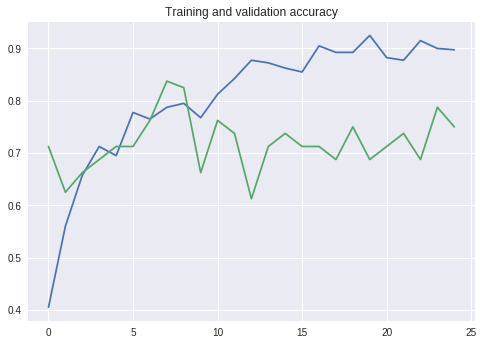

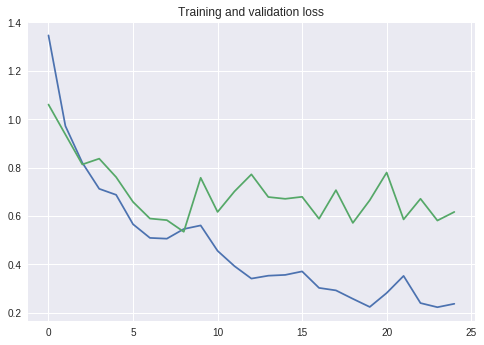

In [0]:
# Retrieve a list of accuracy results on training and test data
# sets for each training epoch
acc = history.history['acc']
val_acc = history.history['val_acc']

# Retrieve a list of list results on training and test data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')

In [0]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('corn_grayleafcheck.jpg',target_size = (64,64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis = 0)
result = classifier.predict(test_image)
training_set.class_indices
if result [0][0] == 1:
    prediction = 'Corn_common_rust'
elif result [0][1] == 1:
    prediction = 'Corn_gray_leaf_spot'
elif result [0][1] == 1:
    prediction = 'Corn_healthy'    
else:
    prediction = 'Corn_northern_leaf_blight'
print(prediction)

Corn_gray_leaf_spot


In [0]:
!ls


apple_rotcheck.jpg   cnncode.ipynb	       corn_healthycheck.jpg
apple_scabcheck.jpg  corn_commonrustcheck.jpg  corn_northenleafblight.jpg
cnn1.ipynb	     corn_grayleafcheck.jpg    dataset
